# QC Linealidad  radionuclide (Dose) calibrator in NM

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
#### Paquete de tiempo
import datetime

%matplotlib inline

#Para cargar los datos

#data = pd.read_csv('testlinealidad.txt', delim_whitespace =True)
################################
######  MEDICINA NUCLEAR #######
################################

###Activimetro CRC 25 PET 
#data = pd.read_csv('linealidadpetmn19.txt', delim_whitespace =True)
###Activimetro 55tR con fuente Co-57
#data = pd.read_csv('linealidadtr2019.txt', delim_whitespace =True)

################################
######  RADIOFARMACIA #######
################################

###Activimetro CRC 15 R 
#data = pd.read_csv('linealidad15rRF2020.txt', delim_whitespace =True)

###Activimetro CRC 25 PET 
#data = pd.read_csv('linealidad25PETRF2020.txt', delim_whitespace =True)

###Activimetro CRC 55 tR 
#data = pd.read_csv('linealidad55trRF2020.txt', delim_whitespace =True)

###Activimetro MECMURPHILL 
#data = pd.read_csv('linealidadMECRF2020.txt', delim_whitespace =True)

###Activimetro Theodorico A
data = pd.read_csv('linealidadTheoARF2020.txt', delim_whitespace =True)

###Activimetro Theodorico B
#data = pd.read_csv('linealidadTheoBRF2020.txt', delim_whitespace =True)

#para ver los primeros datos

data.head()

,Tiempo,ActividadM,ActividadCal
0,0,123.043,123.043
1,1,84.203,84.239
2,2,57.588,57.673
3,3,39.424,39.485
4,4,26.991,27.033


In [137]:
#(1-(norm.cdf(3)-norm.cdf(-3)))*100

In [138]:
perce=(-(data['ActividadCal']-data['ActividadM'])*100)/data['ActividadCal']
data['percent']=perce

In [139]:
data.describe()
#data.dtypes

,Tiempo,ActividadM,ActividadCal,percent
count,22.000000,22.000000,22.000000,22.000000
mean,10.500000,17.715591,17.730227,-1.067585
std,6.493587,32.046397,32.056929,1.818848
min,0.000000,0.040000,0.043000,-6.976744
25%,5.250000,0.315250,0.320000,-1.386623
50%,10.500000,2.346000,2.345000,-0.226417
75%,15.750000,16.996500,17.048000,-0.045168
max,21.000000,123.043000,123.043000,0.245942


In [140]:
max(np.absolute(data['percent']))

6.9767441860465027

In [141]:
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
X = data[['ActividadCal']]
Y = data['ActividadM']

In [143]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [144]:
# Slope 
bl=lm.coef_
bl

array([ 0.99967116])

In [145]:
# Intercept
al=lm.intercept_
al

-0.0088059881549114039

In [146]:
##### de mCi a Bq
mcibq=3.7E7
##### de uCi a Bq
ucibq=3.7E4

### half life  [minutos]
HL= 110
### half life [s]
HLbq= HL*60
### Tau [s]
Taubq= HLbq/np.log(2)

In [147]:
#plt.plot(data['Tiempo'],data['ActividadM'],'ob')
#plt.yscale('log')
1-bl

array([ 0.00032884])

In [148]:
data['ActBq']=data['ActividadM']*mcibq
data['ActMBq']=data['ActBq']/1.0E6
data['IncerBq']=np.sqrt(data['ActBq'])
data['RaizMBq']=np.sqrt(data['ActMBq'])
data['ActicalMBq']=(data['ActividadCal']*mcibq)/1.0E6

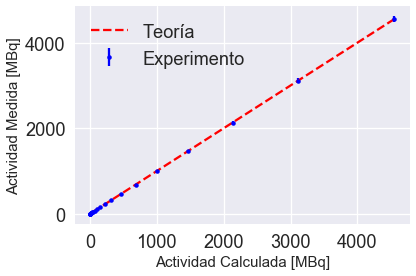

In [149]:
plt.errorbar(data['ActicalMBq'],data['ActMBq'], yerr=data['RaizMBq'],fmt='.b',label='Experimento',capsize=1)
#plt.plot(data['ActividadCal'],data['ActividadM'],'ob',label='Datos')
plt.plot(data['ActicalMBq'],data['ActicalMBq'],'--r',label='Teoría')
plt.xlabel(r'Actividad Calculada [MBq]',size=15)
plt.ylabel(r'Actividad Medida [MBq]',size=15)
plt.legend()

In [150]:
data['LN']=np.log(data['ActMBq'])
#data['LN']=np.log(data['Cuentas'])
#data['LN']=np.log(data['actividad'])

In [151]:
data['ActividadM'][0]

123.04299999999999

In [152]:
Aexp=data['ActividadM'][0]*np.exp(-((data['Tiempo']*np.log(2))/(1.83)))
#np.round(Aexp,2)

## Notas de Clase -Física Experimental II - Capítulo 6

Función a ajustar: 

$$A(t) = A_o e^{-t/\tau}$$

que se puede linealizar tomando el logaritmo natural a ambos lados: 

$$\text{ln} \;A(t) =\text{ln}\; A_o-\frac{t}{\tau}$$

tal que:

$$
\begin{align}
f(t) = \text{ln}\;A(t)\\
a=\text{ln}\; A_o\\
b=-\frac{1}{\tau}
\end{align}
$$


### Ajuste por el metodo de mínimos cuadrados 

$$
\begin{align}
y(t) = \text{ln}\;A(t)\\
\sigma_y^2=\left[\frac{dy}{dA}\right]^2\sigma_A^2\\
\sigma_y^2=\frac{1}{A^2} (\sqrt{A})^2=\frac{1}{A}
\end{align}
$$

#### Pesos    $w = 1/\sigma^2$

In [153]:
w= data['ActMBq']
#w= data['Cuentas']
#w= data['ActividadM']

In [154]:
S=sum(w)


$$
\begin{align}
S= \sum \frac{1}{\sigma_i^2}  \; \; \; S_x= \sum \frac{x_i}{\sigma_i^2}\; \; \; S_y= \sum \frac{y_i}{\sigma_i^2}\\
 S_{xx}= \sum \frac{x_i^2}{\sigma_i^2}\; \; \; S_{xy}= \sum \frac{x_iy_i}{\sigma_i^2}
\end{align}
$$

In [155]:
x=data['Tiempo']*w

In [156]:
Sx=sum(x)

In [157]:
xx=((data['Tiempo'])**2)*w

In [158]:
Sxx=sum(xx)

In [159]:
y=data['LN']*w

In [160]:
Sy=sum(y)

In [161]:
xy=(data['Tiempo']*data['LN'])*w

In [162]:
Sxy=sum(xy)

$$
\begin{align}
f(t)= a+bt\\
a=\frac{1}{\Delta}(S_{xx}S_{y}-S_xS_{xy})\\
b=\frac{1}{\Delta}(SS_{xy}-S_xS_y)\\
\Delta= SS_{xx}-(S_x)^2
\end{align}
$$


In [163]:
### Calculando Delta 
det=(S*Sxx)-(Sx)**2

### Ajuste con pesos de a y b 

In [164]:
a=((Sxx*Sy)-(Sx*Sxy))/det
a

8.4231944423161078

In [165]:
b=((S*Sxy)-(Sx*Sy))/det
b

-0.37913384002027373

#### Incertidumbres

$$
\begin{align}
\text{error a}=\sqrt{\frac{S_{xx}}{\Delta}}\\
\text{error b}=\sqrt{\frac{S}{\Delta}}\\
\end{align}
$$

In [166]:
# incertidumbre acm
inca= np.sqrt(Sxx/det)
# incertidumbre bcm
incb=np.sqrt(S/det)

In [167]:
#inca

### Calculo de Vida media  $\tau$ y $N_o$

$$
\begin{align}
\tau=-\frac{1}{b}\\
e^a= N_o
\end{align}
$$

In [168]:
### Vida Media 
tau=-1/b
tau

2.6375909888353046

In [169]:
### Cuentas
cuen=np.exp(a)
cuen

4551.4195045703418

In [170]:
###Actividad en MBq
#A=(cuen)*np.exp(-(data['Tiempo']/tau))/1.0E6
#N=(cuen)*np.exp(-(data['Tiempo']/tau))
A=(cuen)*np.exp(-(data['Tiempo']/tau))

#### Incertidumbres  vida media y cuentas 

$$
\begin{align}
\sigma^2 (a)=\left[\frac{da}{dN_o}\right]^2\sigma^2 (N_o) \; \; \; \; \sigma (N_o)= N_o \sigma (a)\\
\sigma^2 (\tau)=\left[\frac{d\tau}{db}\right]^2\sigma^2 (b) \; \; \; \; \sigma (\tau)=\frac{1}{b^2} \sigma (b)
\end{align}
$$

In [171]:
inccuen= cuen*inca
inccuen

49.319672417985302

In [172]:
inctau=incb/(b**2)
inctau

0.022292060666870339

In [173]:
#data['incerti']=data['actividad']*0.0182
#data['incerti']=np.sqrt(data['Cuentas'])
data.tail()

,Tiempo,ActividadM,ActividadCal,percent,ActBq,ActMBq,IncerBq,RaizMBq,ActicalMBq,LN
17,17,0.193,0.196,-1.530612,7141000.0,7.141,2672.264957,2.672265,7.252,1.965853
18,18,0.131,0.134,-2.238806,4847000.0,4.847,2201.590334,2.201590,4.958,1.578360
19,19,0.089,0.092,-3.260870,3293000.0,3.293,1814.662503,1.814663,3.404,1.191799
20,20,0.060,0.063,-4.761905,2220000.0,2.220,1489.966443,1.489966,2.331,0.797507
21,21,0.040,0.043,-6.976744,1480000.0,1.480,1216.552506,1.216553,1.591,0.392042


In [174]:
# import the visualization package: seaborn
import seaborn as sns
sns.set_context("talk",font_scale=1.4)

###  Visualización 

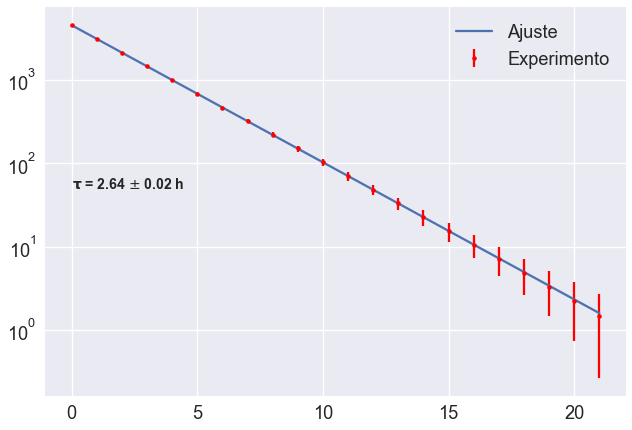

In [175]:
#plt.errorbar(data['Tiempo'],data['ActMBq'], yerr=data['IncerMBq'],fmt='.r',label='Experimento',capsize=1)
plt.errorbar(data['Tiempo'],data['ActMBq'], yerr=data['RaizMBq'],fmt='.r',label='Experimento',capsize=1)
#plt.errorbar(data['Tiempo'],data['Cuentas'], yerr=data['incerti'],fmt='.r',label='Experimento',capsize=1)
#plt.errorbar(data['Tiempo'],data['actividad'], yerr=data['Raizmci'],fmt='.r',label='Experimento',capsize=1)
#plt.plot(data['Tiempo'],N,label='ajuste')
plt.plot(data['Tiempo'],A,label='Ajuste')
#plt.plot((0,17),(3.48,3.48), 'k:', linewidth=2) 
#plt.text(0,3.48,'2$\%$')
#plt.plot((0,18.5),(1.92,1.92), 'k:', linewidth=2) 
#plt.text(0,1.92,'4$\%$')
#plt.plot(data['Tiempo'],data['ActicalMBq'],label='Calculada')
#plt.xlabel(r'Tiempo [h]',size=15)
#plt.ylabel(r'Actividad [MBq]',size=20)
#plt.ylabel(r'Actividad [mCi]',size=20)



tx=r'$\mathbf{{\tau}}$ = {:.2f} $\pm$ {:.2f} h'
plt.annotate(tx.format(tau,inctau),xy=(0, 50), fontsize=14, fontweight="bold")
plt.legend()
#plt.xlim(-0.5,20.4)
#plt.ylim(1E-1,1E2)
plt.yscale('log')
#plt.savefig('linealitheobrf.pdf')

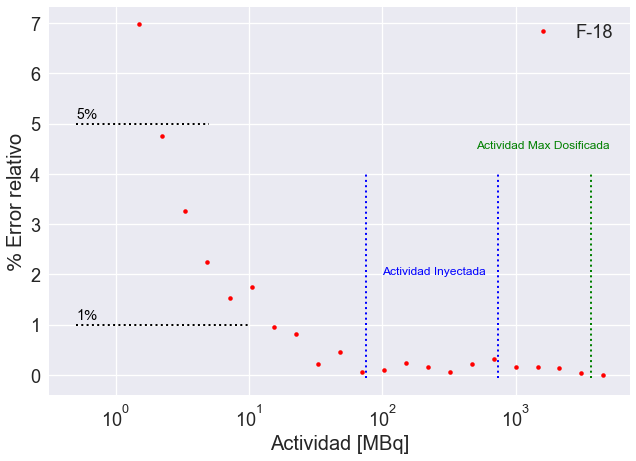

In [180]:
#plt.errorbar(data['ActMBq'],np.absolute(data['percent']), xerr=data['RaizMBq'],fmt='.r',label='Experimento',capsize=1)
plt.plot(data['ActMBq'],np.absolute(data['percent']),'.r',label='F-18')

plt.plot((0.5,10),(1,1), 'k:', linewidth=2)
plt.plot((0.5,5),(5,5), 'k:', linewidth=2)
plt.plot((74.74,74.74),(-0.05,4), 'b:', linewidth=2) 
plt.plot((740,740),(-0.05,4), 'b:', linewidth=2)
plt.plot((3700,3700),(-0.05,4), 'g:', linewidth=2)

plt.text(0.5,1.1,r'1$\%$',fontsize=14,color='k')
plt.text(0.5,5.1,r'5$\%$',fontsize=14,color='k')
plt.text(100,2,r'Actividad Inyectada',fontsize=12,color='b')
plt.text(500,4.5,r'Actividad Max Dosificada',fontsize=12,color='g')
#plt.xlabel(r'Tiempo [h]',size=15)
plt.xlabel(r'Actividad [MBq]',size=20)
plt.ylabel(r'$\%$ Error relativo',size=20)
plt.legend()

plt.xscale('log')
plt.savefig('errorlineatheoA20.pdf')

#### data

In [383]:
Periodosemi=(tau*np.log(2))*60
#Periodosemi=(tau*np.log(2))/60
Periodosemi

109.64544694929259

In [384]:
semividainc=(inctau*np.log(2))*60
#semividainc=(inctau*np.log(2))/60
semividainc

0.97479552724478025

In [134]:
### Tc 99m Activimetro 55 tR-MN 
#período semidesintegración 6.01 h 
#((np.round(Periodosemi,2)-6.01)*100)/6.01
### F -18 Activimetro 25 PET-MN
((np.round(Periodosemi,2)-109.7)*100)/109.7

0.19143117593436074

### Discrepancia

$$ Discrepancia=x_{best}-x_{accepted} $$
$$ t=\frac{|x_{best}-x_{accepted}|}{\sigma}$$

In [329]:
### Tc 99m Activimetro 55 tR-MN 
#período semidesintegración 6.01 h 
discre=np.round(Periodosemi,2)-110

In [330]:
discre<semividainc

True

si discre < semividainc, discrepancia no es significativa. Medición satisfactoria 

In [63]:
#t=(np.absolute(np.round(Periodosemi,2)-6.01))/semividainc

In [64]:
#(1-(norm.cdf(t)-norm.cdf(t)))*100

100.0

In [51]:
#### Sobreestimación porcentaje error
np.round(max(np.absolute(data['percent'])),2)

5.0

### Que tan bueno es el ajuste? - Chi cuadrado

In [59]:
#data['LN']
#((data['LN']-(a+(b*data['Tiempo'])))/data['incerti'])**2

In [67]:
#chicuadrado= sum(((data['Cuentas']-np.round(cuen*np.exp(b*data['Tiempo']),0))/data['incerti'])**2)
#chicuadrado= sum(((data['ActMBq']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['RaizMBq'])**2)
#chicuadrado= sum(((data['actividad']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['Raizmci'])**2)
#chicuadrado

In [68]:
#sum(((data['actividad']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['Raizmci'])**2)
#sum(((data['ActMBq']-np.round(cuen*np.exp(b*data['Tiempo']),2))/data['RaizMBq'])**2)

In [69]:
### Número de grados de libertad= Número de puntos independientes a ajustar - Número de parámetros por hallar (2 línea Recta)
#libertad= len(data['Tiempo'])-2
#libertad

In [70]:
###Chi cuadrado reducido
#chicuadrado/libertad

### Distribución acumulativa Chi-cuadrado

en una terminal ejecute el programa maxima
y escriba: 



gamma_incomplete_regularized(chicuadrado/2,libertad/2);

Nivel de confianza convencional en Física= CL = 0.05

